## <span>MULTIPLE REGRESSION FOR PREDICTIVE MODELING</span>

### **Question for Analysis:**
How many Gigabytes of data will a consumer use on an annual basis? Is it possible to forecast this effectively using a set of independent variables?

### **Objectives and Goals:**
Stakeholders in the organization will profit if they can forecast with reasonable accuracy how many gigabytes of data a customer will use on a yearly basis. This will aid in weighing the benefits and drawbacks of increasing client data limits, providing limitless streaming capabilities, and expanding cloud computing capabilities to meet escalating bandwidth demands.

### **Assumptions:**
Multiple regression is based on the following assumptions:
1. The dependent variable and the independent variables have a linear relationship.
2. The independent variables shouldn't be overly correlated with other explanatory variables.
3. Observations are chosen at random and independently from the population. 
4. The residuals should have a normal distribution with a mean of 0. 
5. Explanatory power should rise as the number of variables increases.

### **Explanation on why multiple regression is an appropriate technique**
Multiple regression is an appropriate strategy for examining the research topic because when attempting to predict how much data a client will use in a given year, other predictor factors may be required to complete our picture. Multiple regression analysis will allow us to assess the strength of the relationship between the dependant variables and several explanatory variables. Multiple regression analysis can also help us understand if our target variable will have a positive or negative linear relationship with these predictor variables, and how that will affect our research question. 

### **Data Goals**
1. Import the dataset into Python using the read_csv command. Import appropriate libraries into Python and define x-axes and y-axes for our multiple linear regression analysis.
2. To have a better grasp of the dataset, look at the data structure.Find outliers through the use of boxplots and impute missing data with either mean, median or mode. 
3. The dependent variable will be "Bandwidth_GB_Year", which will also be the continuous target variable. All binary categorical variables need to be encoded into either 1 or 0 before doing the regression analysis.
4. After defining x and y, the dataset needs to be split into a training set and a test set. 
5. In order to build a model that will tell us how many gigabytes of data a client may utilize in a year, we need to train the model on the training set and predict the test set results. 
6. Continous predictor variables such as Children, Income, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure, Tenure, MonthlyCharge were used in the regression analysis.
7. Finally, these discrete ordinal predictor variables from "Item 1" to "Item 8" from the dataset were renamed according to the data dictionary inorder for the reader to better understand the features.

### **Summary Statistics**

The Imported dataset included 50 columns and 10,000 records. Demographic categorical variables ('CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County','Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'Marital', 'PaymentMethod') were removed. All other binary categorical variables were encoded into either 1 or 0 before doing the regression analysis. There were now 33 numerical independent predictor variables and 1 dependent variable left (34 total columns). The churn dataset had already been cleaned prior to import, and there appeared to be no null or missing values in the dataset. "Bandwidth_GB_Year" and "Tenure" appear to have bimodal distributions, although "Outage sec per week" and "MonthlyCharge" appear to have normal distributions. This dataset's average age is 53.08, with a standard deviation of 20.70. The average household income is $39806.93. The maximum number of children per household is ten. The average number of gigabytes used per household was 3,392 Gigabytes per year. The target variable is "Bandwidth_GB_Year" and all other predictor variables include 'Outage_sec_perweek', 'Email', 'Contacts','Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'TimelyResponse', 'TimelyFixes', 'TimelyReplacements', 'Reliability','Options', 'RespectfulResponse', 'CourteousExchange', 'ActiveListening', 'EncodedGender', 'EncodedChurn', 'EncodedTechie', 'EncodedContract','EncodedPort_modem', 'EncodedTablet', 'EncodedInternetService','EncodedPhone', 'EncodedMultiple', 'EncodedOnlineSecurity','EncodedOnlineBackup', 'EncodedDeviceProtection', 'EncodedTechSupport','EncodedStreamingTV', 'EncodedStreamingMovies','EncodedPaperlessBilling'.

In [33]:
churn.to_csv('newchurn.csv')
newchurn = pd.read_csv('newchurn.csv')
newchurn.head(5)

,Unnamed: 0,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,...,EncodedPhone,EncodedMultiple,EncodedOnlineSecurity,EncodedOnlineBackup,EncodedDeviceProtection,EncodedTechSupport,EncodedStreamingTV,EncodedStreamingMovies,EncodedPaperlessBilling,Bandwidth_GB_Year
0,0,0,68,28561.99,7.978323,10,0,1,6.795513,172.455519,...,1,0,1,1,0,0,0,1,1,904.536110
1,1,1,27,21704.77,11.699080,12,0,1,1.156681,242.632554,...,1,1,1,0,0,0,1,1,1,800.982766
2,2,4,50,9609.57,10.752800,9,0,1,15.754144,159.947583,...,1,1,0,0,0,0,0,1,1,2054.706961
3,3,1,48,18925.23,14.913540,15,2,0,17.087227,119.956840,...,1,0,1,0,0,0,1,0,1,2164.579412
4,4,0,83,40074.19,8.147417,16,2,1,1.670972,149.948316,...,0,0,0,0,0,1,1,0,0,271.493436


In [34]:
newchurn.shape

(10000, 35)

### **Initial Regression Model**

In [35]:
#OLS Regression Results (Dummy variables are not included)

newchurn['intercept'] = 1
lm_bandwidth = sm.OLS(newchurn['Bandwidth_GB_Year'], newchurn[['Children', 'Age', 'Income', 
'Outage_sec_perweek', 'Email', 'Contacts','Yearly_equip_failure', 'Tenure', 'MonthlyCharge',
'TimelyResponse', 'TimelyFixes', 'TimelyReplacements', 'Reliability',
'Options', 'RespectfulResponse', 'CourteousExchange', 'ActiveListening', 'intercept']]).fit()

print(lm_bandwidth.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 5.329e+04
Date:                Fri, 15 Oct 2021   Prob (F-statistic):               0.00
Time:                        16:14:43   Log-Likelihood:                -68489.
No. Observations:               10000   AIC:                         1.370e+05
Df Residuals:                    9982   BIC:                         1.371e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Children                30.9275 

In [36]:
#Define x and y
x = newchurn.drop(['Bandwidth_GB_Year'], axis = 1).values
y = newchurn['Bandwidth_GB_Year'].values

In [37]:
print(x)

[[0.000e+00 0.000e+00 6.800e+01 ... 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 1.000e+00 2.700e+01 ... 1.000e+00 1.000e+00 1.000e+00]
 [2.000e+00 4.000e+00 5.000e+01 ... 1.000e+00 1.000e+00 1.000e+00]
 ...
 [9.997e+03 1.000e+00 4.800e+01 ... 0.000e+00 1.000e+00 1.000e+00]
 [9.998e+03 1.000e+00 3.900e+01 ... 1.000e+00 1.000e+00 1.000e+00]
 [9.999e+03 1.000e+00 2.800e+01 ... 1.000e+00 1.000e+00 1.000e+00]]


In [38]:
print(y)

[ 904.5361102  800.9827661 2054.706961  ... 4159.305799  6468.456752
 5857.586167 ]


In [39]:
#Split the dataset in training set and test set
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [40]:
regr =LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [41]:
y_pred = regr.predict(x_test)
print(y_pred)

[5605.38917596  543.72609356 1428.87782996 ... 6087.44992665 3764.82468677
 5645.08329151]


In [42]:
#grab the intercept
intercept = regr.intercept_
intercept

49.574001160393436

In [43]:
print("The intercept for our model is {:.4}".format(intercept))
print('-'*100)

The intercept for our model is 49.57
----------------------------------------------------------------------------------------------------


In [44]:
#R2 Score
r2_score(y_test, y_pred)

0.9998906499377737

Text(0.5, 1.0, 'Actual vs Predicted')

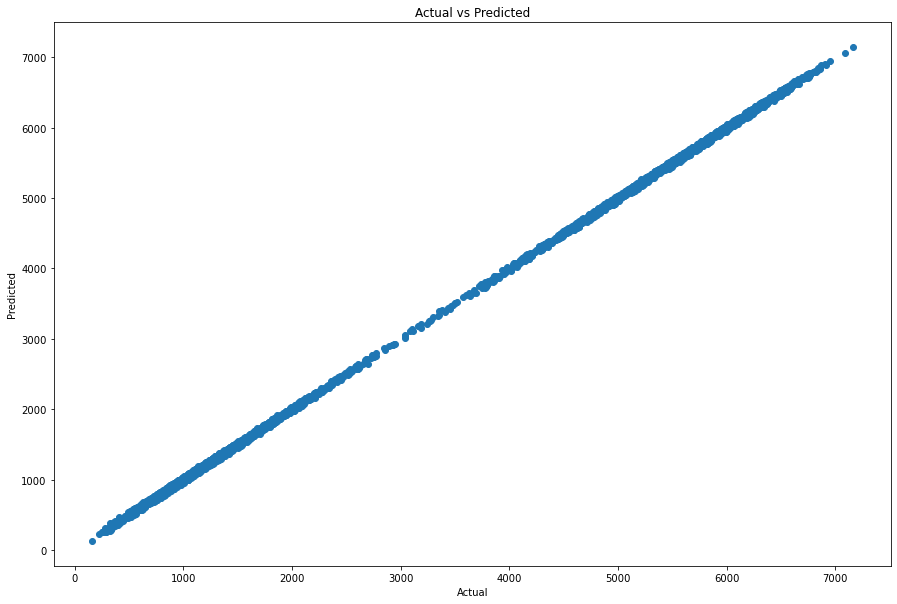

In [45]:
#Actual vs Predicted Graph
plt.figure(figsize = (15,10))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

In [46]:
#Predicted values
pred_y_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred, 'Difference': y_test - y_pred})
pred_y_df [0:20] #First 20 records

,Actual Value,Predicted Value,Difference
0,5570.114970,5605.389176,-35.274206
1,545.183277,543.726094,1.457183
2,1432.922873,1428.877830,4.045043
3,6294.155657,6311.370629,-17.214972
4,1040.201495,1028.434440,11.767055
5,6360.531849,6371.082422,-10.550573
6,5611.443086,5631.782034,-20.338948
7,6512.990012,6520.269628,-7.279616
8,1516.686884,1510.024550,6.662334
9,619.415988,586.882924,32.533064


In [47]:
#All predictor variables (Including the dummy variables)
newchurn['intercept'] = 1
lm_bandwidth = sm.OLS(newchurn['Bandwidth_GB_Year'], newchurn[['Children', 'Age', 'Income', 
'Outage_sec_perweek', 'Email', 'Contacts','Yearly_equip_failure', 'Tenure', 'MonthlyCharge',
'TimelyResponse', 'TimelyFixes', 'TimelyReplacements', 'Reliability',
'Options', 'RespectfulResponse', 'CourteousExchange', 'ActiveListening',
'EncodedGender', 'EncodedChurn', 'EncodedTechie', 'EncodedContract',
'EncodedPort_modem', 'EncodedTablet', 'EncodedInternetService',
'EncodedPhone', 'EncodedMultiple', 'EncodedOnlineSecurity',
'EncodedOnlineBackup', 'EncodedDeviceProtection', 'EncodedTechSupport',
'EncodedStreamingTV', 'EncodedStreamingMovies',
'EncodedPaperlessBilling', 'intercept']]).fit()

print(lm_bandwidth.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.814e+06
Date:                Fri, 15 Oct 2021   Prob (F-statistic):               0.00
Time:                        16:16:03   Log-Likelihood:                -45386.
No. Observations:               10000   AIC:                         9.084e+04
Df Residuals:                    9966   BIC:                         9.108e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Children                  

## Initial MLR Model Equation based on the OLS Regression Results
y = 51.6 + 30.82*X<sub>1</sub> + -3.27*X<sub>2</sub> + 0*X<sub>3</sub> + -0.0226*X<sub>4</sub> + -0.0025*X<sub>5</sub> + -0.2026*X<sub>6</sub>+ -0.3415*X<sub>7</sub> + 81.98*X<sub>8</sub> + 0.96*X<sub>9</sub> + -0.76*X<sub>10</sub> + 0.53*X<sub>11</sub> + 0.22*X<sub>12</sub> + 0.164*X<sub>13</sub>+ .22*X<sub>14</sub> + -0.19*X<sub>15</sub> + 0.1443*X<sub>16</sub> + -0.1796*X<sub>17</sub> + 65.45*X<sub>18</sub> + 6.04*X<sub>19</sub> + 0.3044*X<sub>20</sub> + 1.76*X<sub>21</sub> + -0.74*X<sub>22</sub> + -0.20*X<sub>23</sub> + 422.41*X<sub>24</sub> + -0.66*X<sub>25</sub> + 39.71*X<sub>26</sub> + 72.91*X<sub>27</sub> + 72.04*X<sub>28</sub> + 72.93*X<sub>29</sub> + -7.13*X<sub>30</sub> + 186.53*X<sub>31</sub> + 158.5530*X<sub>32</sub> + 0.48*X<sub>33</sub> 

### **Justification for Model Reduction**

The most sophisticated model isn't always the best. Including variables that aren't clearly significant might sometimes impair the accuracy of forecasts. The full model is commonly referred to as the initial model because it included all known explanatory variables. We want to find a smaller model that is preferable because the full model is not the best model. P values from the OLS regression results provides helpful information. P-values can be used to assess hypotheses of the following form:  The null hypothesis (H_o) is that beta_i **equals zero** when the other variables are included in the model. The alternative hypothesis (H_a) is that beta_i is **not equal** to zero when the other variables are included in the model. 
One model selection strategy is the **backward-elimination strategy**. The strategy starts with the model that includes all potential predictor variables. Variables are eliminated ONE AT A TIME from the model until only variables with statistically significant p values remain (Until P values are less than the alpha value (0.05)
1. Email has the highest p value. Delete the "Email" column and refit the model
2. Other variables with p values greater than the alpha value (0.05) needs to be removed. 
3. Other variables that were eliminated include 'Income', 'Outage_sec_perweek', 'Contacts','Yearly_equip_failure', 'TimelyFixes', 'TimelyReplacements', 'Reliability',
'Options', 'RespectfulResponse', 'CourteousExchange', 'ActiveListening', 'EncodedTechie', 
'EncodedPort_modem', 'EncodedTablet', 'EncodedPhone', 'EncodedPaperlessBilling'
4. Refit the model and see if there are any more p values that are greater than the alpha value. 
5. P value for "TimelyResponse" is 0.093. Remove the "TimelyResponse" variable.
6. Run the seaborn heatmap to see any correlation
 


### **Reduced Regression Model**

In [48]:
#Includes the refined predictor variables.
newchurn['intercept'] = 1
lm_bandwidth = sm.OLS(newchurn['Bandwidth_GB_Year'], newchurn[['Children', 'Age', 'Tenure', 'MonthlyCharge',
'TimelyResponse',
'EncodedGender', 'EncodedChurn', 'EncodedContract', 'EncodedInternetService',
'EncodedMultiple', 'EncodedOnlineSecurity',
'EncodedOnlineBackup', 'EncodedDeviceProtection', 'EncodedTechSupport',
'EncodedStreamingTV', 'EncodedStreamingMovies', 'intercept']]).fit()

print(lm_bandwidth.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.805e+06
Date:                Fri, 15 Oct 2021   Prob (F-statistic):               0.00
Time:                        16:16:52   Log-Likelihood:                -45393.
No. Observations:               10000   AIC:                         9.082e+04
Df Residuals:                    9983   BIC:                         9.094e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Children                  

In [63]:
#Removed the TimelyResponse variable.
newchurn['intercept'] = 1
lm_bandwidth_reduced = sm.OLS(newchurn['Bandwidth_GB_Year'], newchurn[['Children', 'Age', 'Tenure', 'MonthlyCharge',
'EncodedGender', 'EncodedChurn', 'EncodedContract', 'EncodedInternetService',
'EncodedMultiple', 'EncodedOnlineSecurity',
'EncodedOnlineBackup', 'EncodedDeviceProtection', 'EncodedTechSupport',
'EncodedStreamingTV', 'EncodedStreamingMovies', 'intercept']]).fit()

print(lm_bandwidth_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.191e+06
Date:                Fri, 15 Oct 2021   Prob (F-statistic):               0.00
Time:                        16:55:51   Log-Likelihood:                -45394.
No. Observations:               10000   AIC:                         9.082e+04
Df Residuals:                    9984   BIC:                         9.094e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Children                  

**Even after removing all those other predictor variables, our model is still doing a good job approximating the regression predictions.** 

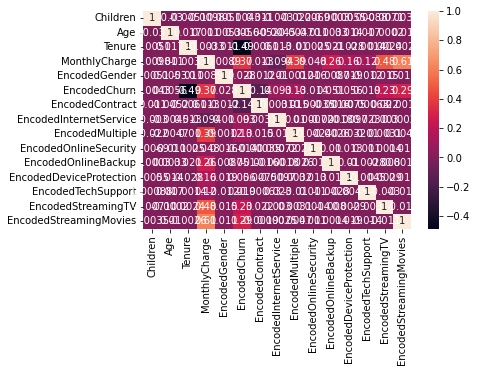

In [61]:
#Seaborn heatmap
churn_bivariation = newchurn[['Children', 'Age', 'Tenure', 'MonthlyCharge',
'EncodedGender', 'EncodedChurn', 'EncodedContract', 'EncodedInternetService',
'EncodedMultiple', 'EncodedOnlineSecurity',
'EncodedOnlineBackup', 'EncodedDeviceProtection', 'EncodedTechSupport',
'EncodedStreamingTV', 'EncodedStreamingMovies']]
sns.heatmap(churn_bivariation.corr(), annot=True)
plt.show()


Reduced Multiple Linear Regression Model Equation:

Now with 15 independent/explanatory variables.

**y = 51.6 + 30.82*X<sub>1</sub> + -3.27*X<sub>2</sub> + 81.9803*X<sub>3</sub> + 0.9560*X<sub>4</sub> + 65.43*X<sub>5</sub> 6.08*X<sub>6</sub>+ 1.74*X<sub>7</sub> + 422.42*X<sub>8</sub> + 39.68*X<sub>9</sub> + 72.89*X<sub>10</sub> + 72.05*X<sub>11</sub> + 72.94*X<sub>12</sub> + -7.14*X<sub>13</sub>+ 186.47*X<sub>14</sub> + 158.51*X<sub>15</sub>**

### **Residual Plot**

<AxesSubplot:xlabel='Tenure'>

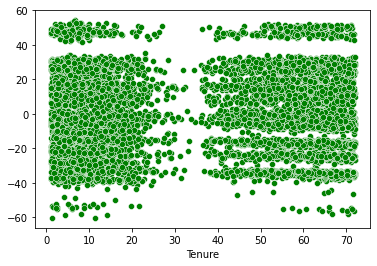

In [67]:
churns = pd.read_csv('newchurn.csv')
churns['intercept'] = 1
residuals = churns['Bandwidth_GB_Year'] - lm_bandwidth_reduced.predict(churns[['Children','Age', 'Tenure', 'MonthlyCharge',
'EncodedGender', 'EncodedChurn', 'EncodedContract', 'EncodedInternetService',
'EncodedMultiple', 'EncodedOnlineSecurity',
'EncodedOnlineBackup', 'EncodedDeviceProtection', 'EncodedTechSupport',
'EncodedStreamingTV', 'EncodedStreamingMovies', 'intercept']])
sns.scatterplot(x=churns['Tenure'],y=residuals,color='green')


### **Summarize Findings and assumptions**
Regression Equation for Reduced Model:
*y = 51.6 + 30.82*X<sub>1</sub> + -3.27*X<sub>2</sub> + 81.9803*X<sub>3</sub> + 0.9560*X<sub>4</sub> + 65.43*X<sub>5</sub> 6.08*X<sub>6</sub>+ 1.74*X<sub>7</sub> + 422.42*X<sub>8</sub> + 39.68*X<sub>9</sub> + 72.89*X<sub>10</sub> + 72.05*X<sub>11</sub> + 72.94*X<sub>12</sub> + -7.14*X<sub>13</sub>+ 186.47*X<sub>14</sub> + 158.51*X<sub>15</sub>**


An interpretation of coefficients of the statistically significant variables: 
The sign of the coefficient indicates whether each independent or dependent variable have a positive or negative relationship. A positive coefficient indicates that the mean of the dependent variable tends to rise when the value of the independent variable rises. A negative coefficient indicates that the dependent variable tends to drop as the independent variable increases.
When the independent variable is modified by one unit while the other variables in the model remain constant, the coefficient value reflects how much the mean of the dependent variable changes.
According to the coefficients, for every 1 unit of:
* Children - Bandwith gigabytes per year will increase by 30.82 units
* Age - Bandwith gigabytes per year will decrease by 3.27 units
* Tenure - Bandwith gigabytes per year will increase by 81.98 units
* MonthlyCharge - Bandwith gigabytes per year will increase by 0.96 units
* EncodedGender - Bandwith gigabytes per year will increase by 65.43 units
* EncodedChurn - Bandwith gigabytes per year will increase by 6.08 units
* EncodedContract - Bandwith gigabytes per year will increase by 1.74 units
* EncodedInternetService - Bandwith gigabytes per year will increase by 422.42 units
* EncodedMultiple - Bandwith gigabytes per year will increase by 39.68 units
* EncodedOnlineSecurity - Bandwith gigabytes per year will increase by 72.89 units
* EncodedOnlineBackup - Bandwith gigabytes per year will increase by 72.06 units
* EncodedDeviceProtection - Bandwith gigabytes per year will increase by 72.94 units
* EncodedTechSupport - Bandwith gigabytes per year will decrease by 7.14 units
* EncodedStreamingTV - Bandwith gigabytes per year will increase by 186.47 units
* EncodedStreamingMovies - Bandwith gigabytes per year will increase by 158.51 units

Hypothesis testing determines the statistical significance of a hypothesis. Because the p values for the predictor variables in our revised MLR model are very small and less than the alpha, the null hypothesis is strongly refuted. The sample size has a substantial influence on statistical significance. There are 10,000 records in the dataset, so it's big enough. However, statistical significance may or may not have practical significance. Practical significance is not influenced by sample size, and after looking at the standard error for each predictor variable, it appears that the "EncodedStreamingMovies" had the largest standard error. As a result, the means for this variable are more dispersed, and any given mean is more likely to be an erroneous reflection of the underlying population mean. 

Limitations: More variables and records linked to the study issue must be added to the dataset on a regular basis in real time. Unexpected events can potentially cause your model to generate incorrect output data. Predictive analytics can tell you when you should act, but not what actions you should take. As a result, whether you choose purely on instinct or standard methods, you may wind up with a suboptimal option. The more difficult a decision is, the more probable it is that you will not select the optimal option.

### **Recommendations**

We may be able to offer an incentive to clients who stay with the telecom business for more than 5 years because there is a direct relationship between bandwidth consumed per year and customer longevity. The longer a consumer spends utilizing data, the higher the chance that bandwidth limits will be raised. In order for the customer to stay with the company for as long as possible, stakeholders must prioritize the client's requirements and improve their resources. For all survey replies, the organization should aim for a mean score of at least 6 points. The target variable ("Bandwidth GB Year") appears to have a negative connection with "EncodedTechSupport." People who don't utilize data much seem to be the ones who have access to the company's tech support. This may be the case because the company's tech support team may notify clients when they have exceeded their data limit, causing them to become more mindful of their data usage.
Instead of a specific group of people, it is recommended that a similar alert be sent to everyone who joins the tele business.

### **Sources for Third-Party Code**

* Linear regression,. statsmodels. (n.d.). Retrieved October 17, 2021, from https://www.statsmodels.org/stable/regression.html. 

* How to do Multiple Linear Regression in Python| Jupyter Notebook|Sklearn. (2020, December 08). Retrieved from https://www.youtube.com/watch?v=WngoqVB6cXw

* Areed1192. (2019, November 23). Sigma_coding_youtube/Machine Learning - Multi Linear Regression Analysis.ipynb at master · areed1192/sigma_coding_youtube. Retrieved from https://github.com/areed1192/sigma_coding_youtube/blob/master/python/python-data-science/machine-learning/multi-linear-regression/MachineLearning-MultiLinearRegressionAnalysis.ipynb


### **Sources**

* Johnson, D. (n.d.). R Vs Python: What’s the Difference? Www.guru99.com. Retrieved October 17, 2021, from https://www.guru99.com/r-vs-python.html#:~:text=Python%20is%20a%20tool%20to

* The Limitations of the Data in Predictive Analytics - dummies. (2019). Dummies. https://www.dummies.com/programming/big-data/data-science/the-limitations-of-the-data-in-predictive-analytics/

* Stephanie. (2019, March 8). Practical Significance. Statistics How To. https://www.statisticshowto.com/practical-significance/